In [14]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sc #dendogramme
from sklearn.cluster import AgglomerativeClustering    #clustering module
import matplotlib.pyplot as plt
import folium
import json

In [15]:
df = pd.read_json("NYCData_00h00.json")
df

,maxResponseWantedAt,mapName,orders
0,2021-02-06T14:17:27.810870+00:09,test,"{'id': 'cmd1', 'pax': 1, 'pickUp': {'lat': 40...."
1,2021-02-06T14:17:27.810870+00:09,test,"{'id': 'cmd2', 'pax': 1, 'pickUp': {'lat': 40...."
2,2021-02-06T14:17:27.810870+00:09,test,"{'id': 'cmd3', 'pax': 2, 'pickUp': {'lat': 40...."
3,2021-02-06T14:17:27.810870+00:09,test,"{'id': 'cmd4', 'pax': 4, 'pickUp': {'lat': 40...."
4,2021-02-06T14:17:27.810870+00:09,test,"{'id': 'cmd5', 'pax': 3, 'pickUp': {'lat': 40...."
...,...,...,...
90,2021-02-06T14:17:27.810870+00:09,test,"{'id': 'cmd91', 'pax': 1, 'pickUp': {'lat': 40..."
91,2021-02-06T14:17:27.810870+00:09,test,"{'id': 'cmd92', 'pax': 1, 'pickUp': {'lat': 40..."
92,2021-02-06T14:17:27.810870+00:09,test,"{'id': 'cmd93', 'pax': 1, 'pickUp': {'lat': 40..."
93,2021-02-06T14:17:27.810870+00:09,test,"{'id': 'cmd94', 'pax': 4, 'pickUp': {'lat': 40..."


In [16]:
data= []
arr = df.values

def extract_coordinates(orders):
    for order in orders:
           data.append([order[2]['pickUp']['lat'], order[2]['pickUp']['lng']])

extract_coordinates(arr)
print(data)

[[40.76088, -73.99078399999999], [40.729988, -73.989616], [40.767632, -73.981575], [40.737343, -74.00052600000001], [40.781887, -73.955925], [40.743343, -73.99987800000001], [40.758041, -73.98984499999999], [40.773769, -73.870834], [40.723797, -74.006218], [40.75919, -73.976761], [40.778343, -73.95411700000001], [40.719387, -74.00173199999999], [40.744263, -73.985603], [40.739567, -73.99613199999999], [40.733986, -73.99295], [40.753723, -73.984871], [40.794228, -73.970512], [40.760181, -73.987488], [40.755333, -73.998581], [40.739651, -74.006355], [40.725121, -74.002998], [40.751236, -73.98670200000001], [40.797359, -73.969841], [40.758945, -73.992195], [40.807728, -73.929344], [40.796532, -73.970428], [40.721516, -73.99781], [40.773106, -73.989349], [40.716721, -74.008217], [40.722606999999996, -73.98613], [40.760178, -73.991325], [40.781349, -73.946136], [40.79314, -73.973], [40.734997, -73.990608], [40.779728000000006, -73.955383], [40.760185, -73.995056], [40.706432, -74.00975], [4

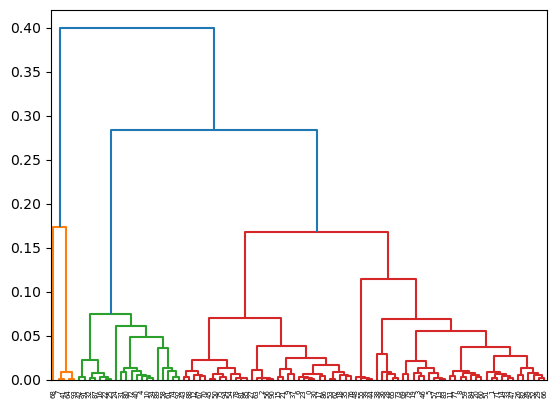

In [17]:
dendo = sc.dendrogram(sc.linkage(data,method = 'ward'))

In [18]:
hca = AgglomerativeClustering(n_clusters=5 , metric= 'euclidean' , linkage= 'ward')
y_hca = hca.fit_predict(data)

In [19]:
y_hca

array([1, 0, 1, 0, 2, 0, 1, 4, 0, 1, 2, 0, 1, 0, 0, 1, 2, 1, 1, 0, 0, 1,
       2, 1, 2, 2, 0, 1, 0, 0, 1, 2, 2, 0, 2, 1, 0, 1, 0, 0, 2, 4, 2, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 1, 1, 4, 0,
       0, 1, 3, 0, 1, 0, 2, 0, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1, 2,
       1, 2, 1, 2, 2, 4, 1], dtype=int64)

In [20]:
arr0 = np

In [21]:
array = np.array(data)
array[y_hca == 2, 0]

array([40.781887, 40.778343, 40.794228, 40.797359, 40.807728, 40.796532,
       40.781349, 40.79314 , 40.779728, 40.778755, 40.781693, 40.756153,
       40.768005, 40.775673, 40.765018, 40.786572, 40.792675, 40.750771,
       40.783962, 40.767467])

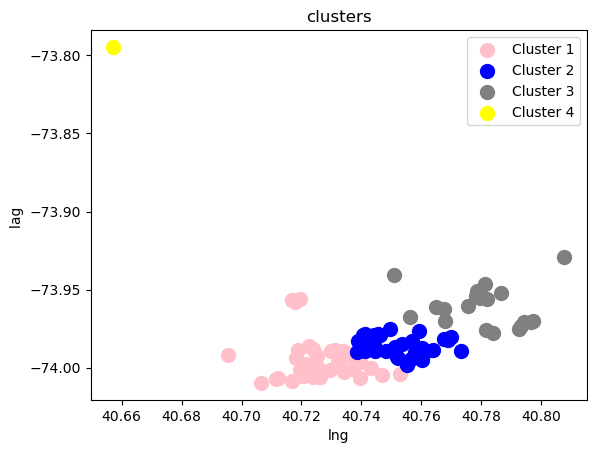

In [22]:
plt.scatter(array[y_hca == 0,0] , array[y_hca == 0,1] , s=100 , c = 'pink' , label = 'Cluster 1' )
plt.scatter(array[y_hca == 1,0] , array[y_hca == 1,1] , s=100 , c = 'blue' , label = 'Cluster 2' )
plt.scatter(array[y_hca == 2,0] , array[y_hca == 2,1] , s=100 , c = 'gray' , label = 'Cluster 3' )
plt.scatter(array[y_hca == 3,0] , array[y_hca == 3,1] , s=100 , c = 'yellow' , label = 'Cluster 4' )
plt.title('clusters')
plt.xlabel('lng')
plt.ylabel('lag ')
plt.legend()

In [23]:
mymap = folium.Map(location=[40.7128, -74.0060], zoom_start=7)
cluster_colors = ['blue', 'pink', 'gray', 'red']

In [24]:
clusters = [0, 1, 2, 3]
for cluster in clusters:
    for point in array[y_hca == cluster]:
        folium.Marker(location=point, icon=folium.Icon(color=cluster_colors[cluster])).add_to(mymap)

In [25]:
mymap.save("my_map.html")

In [26]:
# save the orders of cluster 2 into a json file

tmpData = []

def extract_full_coordinates(orders):
    for order in orders:
           tmpData.append({'id': order[2]['id'],'pickLat': order[2]['pickUp']['lat'], 'pickLng': order[2]['pickUp']['lng'], 'dropLat': order[2]['dropOff']['lat'], 'dropLng': order[2]['dropOff']['lng']})
extract_full_coordinates(arr[y_hca == 2,])

#print(tmpData)

filename = f"NYCData_00h00_cluster_2.json"

with open(filename, 'w') as fp:
    json_dumps_str = json.dumps(tmpData, indent=2)
    print(json_dumps_str, file=fp)